<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Part3.1_Binary_Classification_Model_ipynX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to BinaryClassifiaction Model

### Problem :- Email Spam Detection
Here we are going to create a model that can predict the mail is a Spam(1)/Not a Spam(0), using the provided subject of the email.

In [114]:
# Modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Data Set

#### The dataset used in this example is sourced from Kaggle (original authors Almeida and Hidalgo, 2011) is provided below.
* [Spam test Dataset](https://www.kaggle.com/datasets/team-ai/spam-text-message-classification)



In [115]:
#Load Data
dataset = pd.read_csv('/content/drive/MyDrive/SPAMtextmessage.csv')
# Convert ham to 0 and spam to 1
dataset['Category']= dataset['Category'].str.replace('ham','0')
dataset['Category']= dataset['Category'].str.replace('spam','1')
dataset['Category']= dataset['Category'].astype(int)
sentences = dataset['Message'].tolist()
labels = dataset['Category'].tolist()
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)
# Sentence variables
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
# Labels variables
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [116]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [117]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type,
                       truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 16)           16000     
                                                                 
 flatten_14 (Flatten)        (None, 1600)              0         
                                                                 
 dense_38 (Dense)            (None, 6)                 9606      
                                                                 
 dense_39 (Dense)            (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [119]:
num_epochs = 20
history=model.fit(padded, training_labels_final, epochs=num_epochs,batch_size=128, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
35/35 [==============================] - 2s 19ms/step - loss: 0.6360 - accuracy: 0.8418 - val_loss: 0.5325 - val_accuracy: 0.8700
Epoch 2/20
35/35 [==============================] - 0s 11ms/step - loss: 0.4247 - accuracy: 0.8649 - val_loss: 0.3498 - val_accuracy: 0.8700
Epoch 3/20
35/35 [==============================] - 0s 10ms/step - loss: 0.3421 - accuracy: 0.8649 - val_loss: 0.3085 - val_accuracy: 0.8700
Epoch 4/20
35/35 [==============================] - 0s 11ms/step - loss: 0.2892 - accuracy: 0.8647 - val_loss: 0.2447 - val_accuracy: 0.8700
Epoch 5/20
35/35 [==============================] - 0s 10ms/step - loss: 0.2227 - accuracy: 0.8649 - val_loss: 0.1886 - val_accuracy: 0.8700
Epoch 6/20
35/35 [==============================] - 0s 11ms/step - loss: 0.1865 - accuracy: 0.8649 - val_loss: 0.1688 - val_accuracy: 0.8700
Epoch 7/20
35/35 [==============================] - 0s 12ms/step - loss: 0.1708 - accuracy: 0.8649 - val_loss: 0.1585 - val_accuracy: 0.8700
Epoch 8/20
35

In [120]:
model.evaluate(testing_padded,testing_labels_final)
model_testpredition = model.predict(testing_padded,batch_size=128)
print(model_testpredition[3])
testing_padded[3]
testing_sentences[3]
print(testing_labels_final[3])

9/9 [==============================] - 0s 2ms/step
[0.9987642]
1


<Axes: >

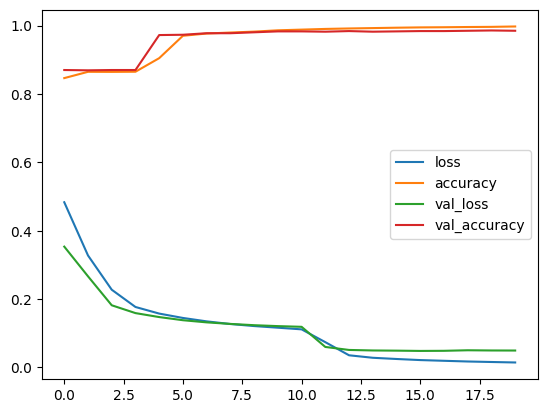

In [106]:
pd.DataFrame(history.history).plot()

In [107]:
# Optimal learning rate.
model2= tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])
# Compile
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Learning rate Schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
# fitting
hist=model2.fit(padded,training_labels_final,epochs=100,callbacks=[lr_schedular],batch_size=500,validation_data=(testing_padded,testing_labels_final))

Epoch 1/100
9/9 [==============================] - 6s 76ms/step - loss: 1.1158 - accuracy: 0.8649 - val_loss: 0.7008 - val_accuracy: 0.8700 - lr: 1.0000e-04
Epoch 2/100
9/9 [==============================] - 0s 35ms/step - loss: 0.6041 - accuracy: 0.8649 - val_loss: 0.5234 - val_accuracy: 0.8700 - lr: 1.1220e-04
Epoch 3/100
9/9 [==============================] - 0s 32ms/step - loss: 0.5172 - accuracy: 0.8649 - val_loss: 0.4760 - val_accuracy: 0.8700 - lr: 1.2589e-04
Epoch 4/100
9/9 [==============================] - 0s 32ms/step - loss: 0.4780 - accuracy: 0.8649 - val_loss: 0.4484 - val_accuracy: 0.8700 - lr: 1.4125e-04
Epoch 5/100
9/9 [==============================] - 0s 37ms/step - loss: 0.4540 - accuracy: 0.8649 - val_loss: 0.4293 - val_accuracy: 0.8700 - lr: 1.5849e-04
Epoch 6/100
9/9 [==============================] - 0s 29ms/step - loss: 0.4358 - accuracy: 0.8649 - val_loss: 0.4138 - val_accuracy: 0.8700 - lr: 1.7783e-04
Epoch 7/100
9/9 [==============================] - 0s 41ms

Text(0, 0.5, 'Learning Rate')

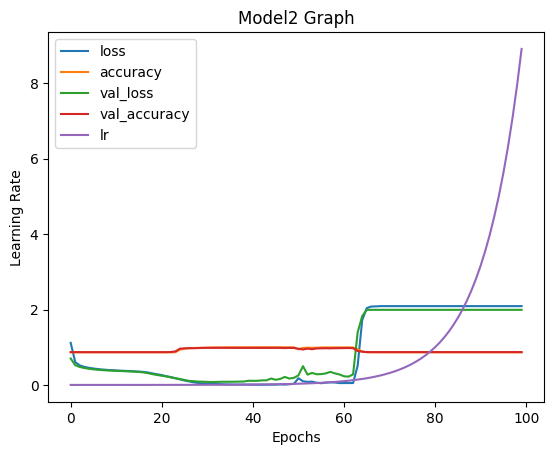

In [108]:
pd.DataFrame(hist.history).plot()
plt.title('Model2 Graph')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')

In [109]:
model2.evaluate(testing_padded,testing_labels_final)

35/35 [==============================] - 0s 3ms/step - loss: 1.9919 - accuracy: 0.8709


[1.991943359375, 0.870851993560791]

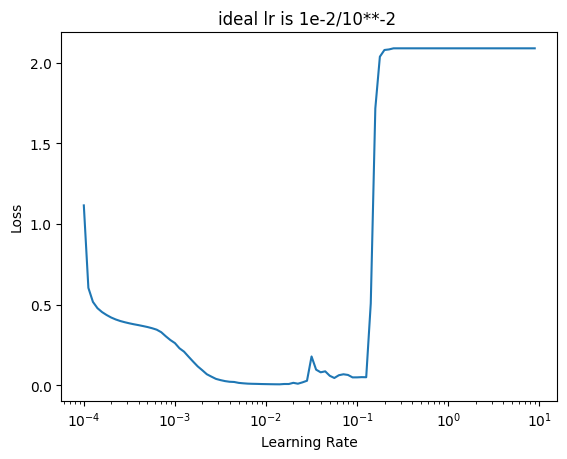

In [110]:
# plot loss vs lr
lr = 1e-4*(10**(tf.range(100)/20))
plt.semilogx(lr,hist.history['loss'])
plt.title('ideal lr is 1e-2/10**-2 ')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()


In [148]:

# Set lr = 0.01
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'sigmoid')
])

model3.compile(loss='binary_crossentropy',metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model3.fit(padded,training_labels_final,batch_size=128,epochs=100,
           validation_data=(testing_padded,testing_labels_final))


Epoch 1/100
35/35 [==============================] - 2s 12ms/step - loss: 0.2362 - accuracy: 0.8578 - val_loss: 0.1066 - val_accuracy: 0.9668
Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0477 - accuracy: 0.9859 - val_loss: 0.0494 - val_accuracy: 0.9848
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.0545 - val_accuracy: 0.9874
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.0850 - val_accuracy: 0.9776
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0686 - val_accuracy: 0.9874
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0837 - val_accuracy: 0.9865
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0930 - val_accuracy: 0.9857
Epoch 8/100


In [159]:
import random
ans=model3.predict(testing_padded,batch_size=128)
def Sample_Ans(num_sample=5):
  for i in range(num_sample):
    i=random.randrange(int(len(testing_padded)))
    print(f'''

      Prediction:{int(ans[i])},
      Sentence: {testing_sentences[i]},
      label:{testing_labels_final[i]}

        ''')


9/9 [==============================] - 0s 2ms/step


In [156]:
model3.evaluate(testing_padded,testing_labels_final)

35/35 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9803


[0.2204759567975998, 0.9802690744400024]

In [160]:
Sample_Ans()



      Prediction:0,
      Sentence: Wot is u up 2 then bitch?,
      label:0

        


      Prediction:0,
      Sentence: Dunno, my dad said he coming home 2 bring us out 4 lunch. Yup i go w u lor. I call u when i reach school lor...,
      label:0

        


      Prediction:1,
      Sentence: Want the latest Video handset? 750 anytime any network mins? Half price line rental? Reply or call 08000930705 for delivery tomorrow,
      label:1

        


      Prediction:0,
      Sentence: Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B,
      label:1

        


      Prediction:1,
      Sentence: Get your garden ready for summer with a FREE selection of summer bulbs and seeds worth £33:50 only with The Scotsman this Saturday. To stop go2 notxt.co.uk,
      label:1

        
